# TRABAJO Parte 2: AIA_2022-2023

# Transfer Learning con CNNs - Dataset: Flowers

La idea de este trabajo es familiarizarnos con dos situaciones muy habituales en la actividad real de un "Machine Learning Engineer":

1.   En primer lugar, con una de las técnicas más potentes asociadas con las redes neuronales: el **Transfer Learning**. Dado que las redes neuronales, para resolver un problema, capturan en su estructura de capas y pesos una representación jerárquica del problema.
Entonces..., ¿por qué no aprovechar ese conocimiento obtenido, para resolver otro problema diferente?

2.  En segundo lugar, con la **busqueda de información sobre conceptos nuevos**. En este caso, los dos primeros modelos a implementar los hemos trabajado en clase. No así el Transfer Learning, y por tanto, deberéis buscar vosotros mismos cómo hacer lo que se pide para el Modelo 3. Consultar en blogs, web y tutoriales es algo común en el día a día de alguien que quiere profundizar en el ML y, para ello, existen infinidad de fuentes. A modo de ejemplo, una fuente para profundizar en el Transfer Learning con redes convolucionales es: https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/

En este trabajo vamos intentar resolver un problema de clasificación sobre un dataset propuesto por Tensorflow en 2019 conocido como "flowers". Este conjunto está formado por 3670 imágenes de flores pertenecientes a 5 clases diferentes. Para ello implementaremos 3 modelos:

*   Modelo 1: implementación de una CNN básica.
*   Modelo 2: es una evolución del modelo anterior, aplicando técnicas que reduzcan el overfitting.
*   Modelo 3: rompemos la barrera de tener que seguir complicando nuestro modelo y se pide aplicar transfer learning utilizando un pre-trained model.





# a) Carga de datos

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import pathlib
import os
import glob
import shutil
tf.__version__

'2.12.0'

Descargamos el dataset que pone a nuestra disposición Tensorflow.

In [2]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228813984/228813984 [==============================] - 6s 0us/step


Tras completar la descarga, debemos tener la siguiente estructura de directorios:

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>daisy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
</pre>

Desgraciadamente, para este dataset, Tensorflow no nos proporciona la estructura de directorios necesaria de train y de validación. Por lo que debemos proceder del siguiente modo:

* Crear una carpeta `train` y de `val`, cada una de ellas debe contener a su vez, cinco subdirectorios: uno para cada clase de flor.
* Moveremos las imágenes de las carpetas originales a estas nuevas carpetas. De modo que el 80% de las imágenes vayan al conjunto de train y el 20% restante al de validación.
* La estructura final de directorios debe ser la siguiente:

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>train</b>
    |______ <b>daisy</b>: [12.jpg, 28.jpg, 31.jpg ....]
    |______ <b>dandelion</b>: [41.jpg, 22.jpg, 35.jpg ....]
    |______ <b>roses</b>: [121.jpg, 92.jpg, 38.jpg ....]
    |______ <b>sunflowers</b>: [93.jpg, 23.jpg, 83.jpg ....]
    |______ <b>tulips</b>: [109.jpg, 267.jpg, 93.jpg ....]
 |__ <b>val</b>
    |______ <b>daisy</b>: [507.jpg, 508.jpg, 509.jpg ....]
    |______ <b>dandelion</b>: [719.jpg, 720.jpg, 721.jpg ....]
    |______ <b>roses</b>: [514.jpg, 515.jpg, 516.jpg ....]
    |______ <b>sunflowers</b>: [560.jpg, 561.jpg, 562.jpg .....]
    |______ <b>tulips</b>: [640.jpg, 641.jpg, 642.jpg ....]
</pre>

Creamos una lista con el nombre de las 5 clases. En castellano sería: margaritas, diente de león, rosas, girasoles y tulipanes.

In [3]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

Creemos la estructura de directorios necesaria:

In [4]:
SPLIT_RATIO=0.8

for cl in classes:
    # path de las imagenes de la clase cl
    img_path = os.path.join(base_dir, cl)

    # obtenemos la lista de todas las imagenes
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Imagenes".format(cl, len(images)))

    # determinamos cuantas imagenes son el 80%
    num_train = int(round(len(images)*SPLIT_RATIO))

    # separamos las imagenes en dos listas
    train, val = images[:num_train], images[num_train:]

    # creamos la carpeta de train/clase y val/clase
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
            os.makedirs(os.path.join(base_dir, 'train', cl))
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
            os.makedirs(os.path.join(base_dir, 'val', cl))

    # movemos las imagenes
    for t in train:
        shutil.move(t, os.path.join(base_dir, 'train', cl))
    for v in val:
        shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Imagenes
daisy: 633 Imagenes
dandelion: 898 Imagenes
sunflowers: 699 Imagenes
tulips: 799 Imagenes


Preparamos variables con las rutas de los diferentes directorios:

In [5]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

daisy_dir = os.path.join(train_dir, 'daisy')
dandelion_dir = os.path.join(train_dir, 'dandelion')
roses_dir = os.path.join(train_dir, 'roses')
sunflowers_dir = os.path.join(train_dir, 'sunflowers')
tulips_dir = os.path.join(train_dir, 'tulips')

Muestre el nombre de dos ficheros cualquiera en alguna de esas rutas:

In [6]:
daisy_dir_files = os.listdir(daisy_dir)
print(daisy_dir_files[:2])

['5512287917_9f5d3f0f98_n.jpg', '3275951182_d27921af97_n.jpg']


Es decir, la clase a la que pertenece cada imagen no viene dada por el nombre del fichero sino por el directorio en el que se encuentra almacenada.

Muestra el número de imágenes de train que tenemos de cada clase:

In [7]:
daisy_dir_files = os.listdir(daisy_dir)
dandelion_dir_files = os.listdir(dandelion_dir)
roses_dir_files = os.listdir(roses_dir)
sunflowers_dir_files = os.listdir(sunflowers_dir)
tulips_dir_files = os.listdir(tulips_dir)


print('Training images:')
print('\ndaisy:', len(daisy_dir_files))
print('dandelion:', len(dandelion_dir_files))
print('roses:', len(roses_dir_files))
print('sunflowers:', len(sunflowers_dir_files))
print('tulips:', len(tulips_dir_files))

print("\nTotal de imágenes para Train : ", sum(len(os.listdir(os.path.join(train_dir, class_dir))) for class_dir in os.listdir(train_dir)))
print("Total de imágenes para Test : ", sum(len(os.listdir(os.path.join(val_dir, class_dir))) for class_dir in os.listdir(val_dir)))


Training images:

daisy: 506
dandelion: 718
roses: 513
sunflowers: 559
tulips: 639

Total de imágenes para Train :  2935
Total de imágenes para Test :  735


# b) Visualización del dataset

Muestra 3 imágenes de cada una de las clases, utilizando como título de la imagen, el shape del array de numpy asociado a cada imagen. Comprueba que las imágenes tienen diferentes shapes, por lo que más adelante tendremos que unificar su tamaño.

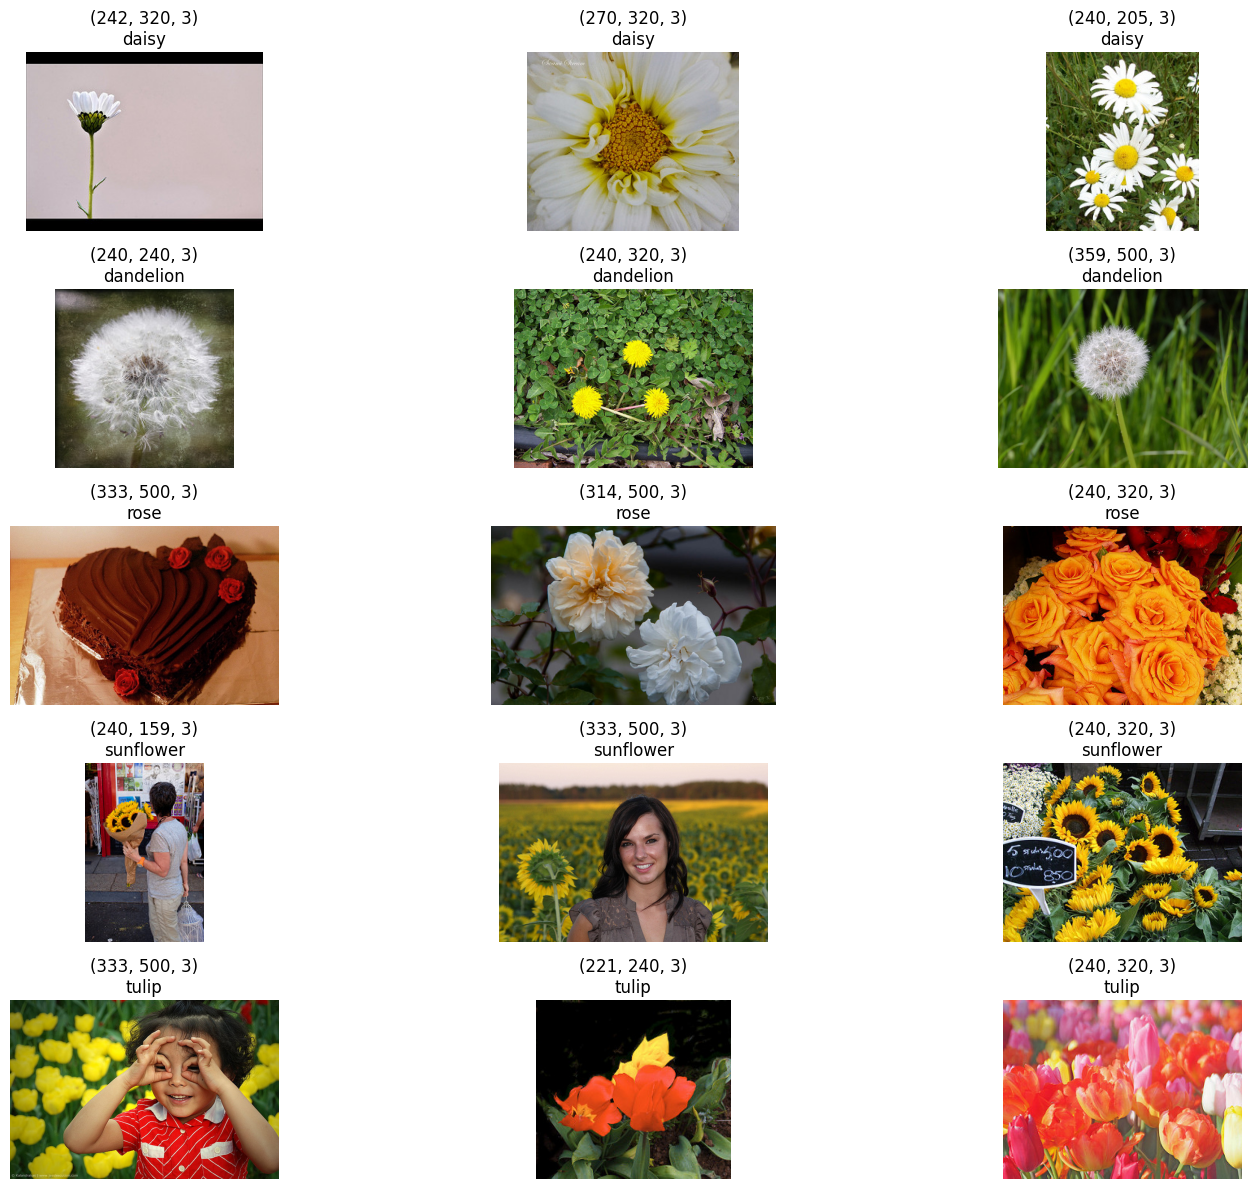

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

next_daisy_pix = [os.path.join(daisy_dir, fname) for fname in daisy_dir_files[0:3]]
next_dandelion_pix = [os.path.join(dandelion_dir, fname) for fname in dandelion_dir_files[0:3]]
next_rose_pix = [os.path.join(roses_dir, fname) for fname in roses_dir_files[0:3]]
next_sunflowers_pix = [os.path.join(sunflowers_dir, fname) for fname in sunflowers_dir_files[0:3]]
next_tulips_pix = [os.path.join(tulips_dir, fname) for fname in tulips_dir_files[0:3]]

classes2 = ['daisy', 'daisy', 'daisy', 'dandelion', 'dandelion', 'dandelion', 'rose', 'rose', 'rose', 'sunflower', 'sunflower', 'sunflower', 'tulip', 'tulip', 'tulip']


plt.figure(figsize=(16,12))
for i, img_path in enumerate(next_daisy_pix + next_dandelion_pix + next_rose_pix + next_sunflowers_pix + next_tulips_pix):
  sp = plt.subplot(5, 3, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  class_name = classes2[i]
  plt.title(f'{img.shape}\n{class_name}')
  plt.imshow(img)

plt.tight_layout()


# c) Modelo 1: CNN básica (objetivo: accuracy_valid > 60%)


Implemente una red convolucional para resolver el problema de clasificación. Para ello se sugiere una CNN con 3 capas convolucionales + pooling con la siguiente estructura:

Bloque de procesamiento de imagen:
1.   32 kernels -> 64 kernels -> 96 kernels
2.   kernels de 3x3.
3.   Stride = 1 y padding = SI.
4.   Función de activación ReLU.
5.   Maxpooling de 2x2 con stride clásico de 2 pixeles.
6.   Igualamos el tamaño de todas las imágenes a 150 x 150.

Bloque de decisión:
7.   Capa densa de 512 neuronas.
8.   Capa densa de salida.

**Entrene un modelo con la estructura anterior de manera que obtenga un accuracy (sobre el conjunto de validación) > 60%.** Utilice el optimizador que considere más adecuado.

Sugerencias:
*   Recuerda que si no se realiza conversión a One-Hot de la etiqueta a predecir, debes utilizar como función de error `SparseCategoricalCrossentropy` (este es el procedimiento que hemos usado en clase).
*   Considera un learning rate en el entorno de 0.001.
*   En el caso de los generators utiliza `class_mode='sparse'`.
*   Puedes utilizar p.e. un `batch_size = 100`.




In [10]:
import tensorflow as tf
from tensorflow import keras

model_1 = keras.Sequential()


# Entrada: (150,150,3) la entrada de la red serán imágenes 150x150 de 3 canales (RGB)
model_1.add(keras.layers.Conv2D(
              filters=32,         # filtros
              kernel_size=(3, 3), # tamaño filtro
              strides=(1, 1),     # como viaja, es el valor por defecto
              padding='same',     # utiliza padding
              activation='relu',
              input_shape=(150, 150, 3)))

# Entrada: (150,150,32) Seguimos teniendo tamaño 150x150 pues hemos utilizado padding, al usar 32 kernels tenemos un canal por cada uno de estos
model_1.add(keras.layers.MaxPooling2D(
              pool_size=(2, 2),   # max de cada bloque 2x2
              strides=(2, 2)))    # no overlapping con el pool size

# Entrada: (75,75,32) Ahora hemos salido de la primera capa de pooling, lo que dados los valores por defecto nos deja el tamaño a la mitad (75x75) con los mismos canales (32)
model_1.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))

# Entrada: (75,75,64) Pasando la siguiente capa convolucional ahora hemos pasado a 64 kernels lo que significan 64 canales, una vez más usamos padding por lo que no perdemos dimensionalidad (75x75)
model_1.add(keras.layers.MaxPooling2D(2))

# Entrada: (37,37,64) Saliendo de la segunda capa de pooling reducimos una vez más la dimensionalidad a la mitad (37x37)
model_1.add(keras.layers.Conv2D(96, 3, padding='same', activation='relu'))

# Entrada: (37,37,96) Finalmente la última capa convolucional emplea 96 kernels lo que son 96 caracteristicas
model_1.add(keras.layers.MaxPooling2D(2))

# Entrada: (18,18,96) Volvemos a reducir la dimensionalidad con la última capa de pooling a la mitad (valores estandar, 18x18) con los mismos canales
model_1.add(tf.keras.layers.Flatten())
# Salida: 31104 -> Hacemos flatten, "aplanamos" nuestra red, lo que resulta en un shape de 18 * 18 * 96 = 31104



model_1.add(keras.layers.Dense(units=512, activation='relu'))
# Salida: Al ser una capa densa su shape será el nº de neuronas (salidas) que tiene -> 512

model_1.add(keras.layers.Dense(units=5, activation='softmax'))
# Salida: Shape de 5, es la última capa con función de activación softmax para clasificación multiclase


optim_1 = keras.optimizers.Adam(learning_rate=0.001)
model_1.compile(loss='SparseCategoricalCrossentropy',
              optimizer=optim_1,
              metrics=['acc'])



Indica cual es el shape de la imagen antes y después de cada capa de la red. **Explica cómo has obtenido dichos valores**. Compara el resultado con un summary() del modelo

|Capa| Shape a la salida| #parámetros |
|:-|:-:|:-:|
|Conv_1|(150,150,32)| 896
|Pool_1|(75,75,32)| 0
|Conv_2|(75,75,64)| 18496
|Pool_2|(37,37,96)| 0
|Conv_3|(37,37,96)| 55392
|Pool_3|(37,37,96)| 0
|flatten|(18,18,96)| 0
|densa_1|(31104)| 15925760
|densa_2|(5)| 2565

* Para las capas Convolucionales, por ej `Conv_2`:
  * **Dimensiones**: Se mantiene la dimension de entrada ajustándola a los Kernels de la capa, (75,75,32) &rarr; (75,75,64)
  * **Parámetros**: Kernel_Size **·** Canales entrada **·** Num_Kernels + Bias =  (3**·**3) **·** 3 **·** 32 + 32 = 896

* Para las capas de Pooling, por ej `Pool_2`:
 * **Dimensiones**: Al tener Stride 2 cada convolución se hace dando "saltos" de dos en dos, lo que provoca reducir el tamaño a la mitad en cada canal, manteniendo el mismo número de Canales, (75,75,64) &rarr; (37,37,64)




In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

Muestra la evolución de la función de error (train y valid) durante el entrenamiento.__Explica qué problema presenta el modelo que hemos entrenado.__

In [12]:

# Recuerda que si no se realiza conversión a One-Hot de la etiqueta a predecir, debes utilizar como función de error SparseCategoricalCrossentropy (este es el procedimiento que hemos usado en clase).
# Considera un learning rate en el entorno de 0.001.
# En el caso de los generators utiliza class_mode='sparse'.
# Puedes utilizar p.e. un batch_size = 100.

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator_model_1 = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=100,
        class_mode='sparse')

validation_generator_model_1 = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=100,
        class_mode='sparse')


es_callback = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)


Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


In [13]:
history_1 = model_1.fit(
      train_generator_model_1,
      steps_per_epoch=29,  # 2900 images = batch_size * steps,
      epochs=50,
      validation_data=validation_generator_model_1,
      validation_steps=7,  # 700 images = batch_size * steps,
      callbacks=[es_callback],
      verbose=2)

Epoch 1/50
29/29 - 29s - loss: 1.6874 - acc: 0.3471 - val_loss: 1.3132 - val_acc: 0.4243 - 29s/epoch - 1s/step
Epoch 2/50
29/29 - 16s - loss: 1.1576 - acc: 0.5175 - val_loss: 1.0616 - val_acc: 0.6000 - 16s/epoch - 555ms/step
Epoch 3/50
29/29 - 16s - loss: 1.0161 - acc: 0.5996 - val_loss: 1.0171 - val_acc: 0.6014 - 16s/epoch - 565ms/step
Epoch 4/50
29/29 - 14s - loss: 0.9000 - acc: 0.6459 - val_loss: 1.0189 - val_acc: 0.6086 - 14s/epoch - 494ms/step
Epoch 5/50
29/29 - 16s - loss: 0.7895 - acc: 0.6963 - val_loss: 0.9532 - val_acc: 0.6443 - 16s/epoch - 562ms/step
Epoch 6/50
29/29 - 17s - loss: 0.6785 - acc: 0.7464 - val_loss: 0.9097 - val_acc: 0.6614 - 17s/epoch - 573ms/step
Epoch 7/50
29/29 - 17s - loss: 0.5534 - acc: 0.8021 - val_loss: 0.9795 - val_acc: 0.6214 - 17s/epoch - 578ms/step
Epoch 8/50
29/29 - 17s - loss: 0.4258 - acc: 0.8511 - val_loss: 1.0374 - val_acc: 0.6471 - 17s/epoch - 570ms/step
Epoch 9/50
29/29 - 17s - loss: 0.2958 - acc: 0.9005 - val_loss: 1.1745 - val_acc: 0.6357 - 

In [14]:
final_accuracy = history_1.history['val_acc'][-5] # paciencia 4, obtuvo 4 epochs en la que no se mejoró el valor de la loss function en este índice
print("Resultado Final:", final_accuracy)

Resultado Final: 0.6614285707473755


El modelo obtiene aproximadamente en torno a un 62-69% de accuracy en el conjunto de validación, al cabo de algunas épocas vemos que se estanca y para por el callback de Early stopping, mientras que en el conjunto de entrenamiento no para de subir, hasta un 95% aproximadamente o más para cuanto el callback para la ejecución.

* Tenemos un problema de Overfitting (sobreajuste) pues el modelo no para de mejorar su rendimiento en el conjunto de entrenamiento mientras que en el de prueba este fluctúa hasta el punto que se acaba la paciencia y el callback para la ejecución, en el siguiente gráfico podemos ver claramente esto :

  * A veces incluso ni siquiera mejora la loss function en el conjunto de prueba, lo que es un aún más claro problema de sobreajuste.


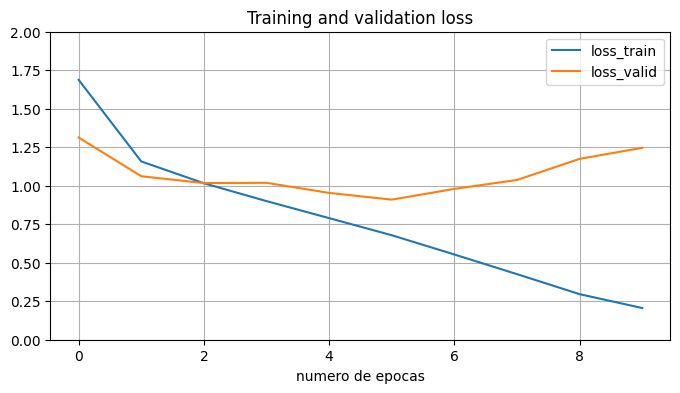

In [15]:
import matplotlib.pyplot as plt

pd.DataFrame({'loss_train': history_1.history['loss'],
              'loss_valid': history_1.history['val_loss']}).plot(figsize=(8,4))

plt.grid(True)
plt.ylim(0,2)
plt.xlabel('numero de epocas')
plt.title('Training and validation loss');

# d) Modelo 2: reducción del overfitting (objetivo: accuracy_valid > 70%)

Introduzca en el modelo anterior las dos técnicas más habituales de reducción del overfitting:

    * drop-out
    * data augmentation

El objetivo es alcanzar un **objetivo es conseguir un accuracy sobre el conjunto de validacion > 70%.**

**Explica en qué consisten y qué utilidad tienen para nuestro problema**

* **Drop-out**: es un método que "tortura" a la red de forma que le cuesta recordar datasets grandes, lo que hace es apagar neuronas de la capa, es un método que dependiendo del problema que se esté trabajando puede ser eficaz o contraproducente.
  * El parámetro `drop_rate` determina el % de neuronas que se apagarán en la capa a la que hagamos dropout, estas cambian de un minibatch a otro, aunque siempre se apagará el mismo %

* **Data augmentation** es una técnica que consiste en crear nuevos ejemplos sintéticos a partir de los originales de nuestro dataset, el objetivo es expandir su tamaño y tener más datos con los que entrenar y trabajar, lo haremos sobre los datos para train pues no queremos alterar su rendimiento en el conjunto de validación.
  * No hay una sola forma de realizar data augmentation, pues se deben generar ejemplos válidos para el problema, y que además no creen sesgos en el modelo.

__Explica qué tipos de augmentation vas a considerar y qué utilidad tienen en nuestro problema de clasificacion__

* **Flips Horizontales** son una buena elección, el resultado seguirá siendo lo que podría haber sido un ejemplo original de una flor, aunque también será el más básico

* **Cambios de Color** no serán una buena idea, muchas flores son claramente reconocibles por esto, como por ejemplo los girasoles que siempre tienen pétalos amarillos por lo que esta opción puede ser contraproducente

* **Cambios de brillo** sí que pueden ser útiles para simular fotos de flores en distintas condiciones de iluminación, lo que sin duda ayudará al modelo.

* Simular cambios de posición en las flores puede ser interesante, por ello también haremos **rotaciones**, **desplazamientos** y **Zooms** a las flores.

Empezaremos aplicando dropout en la primera capa densa (la unica realmente pues la siguiente es la de salida), para ello volvemos a definir el modelo:

In [16]:
import tensorflow as tf
from tensorflow import keras


model_2 = keras.Sequential()


model_2.add(keras.layers.Conv2D(
              filters=32,         # filtros
              kernel_size=(3, 3), # tamaño filtro
              strides=(1, 1),     # como viaja, es el valor por defecto
              padding='same',     # utiliza padding
              activation='relu',
              input_shape=(150, 150, 3)))

model_2.add(keras.layers.MaxPooling2D(
              pool_size=(2, 2),   # max de cada bloque 2x2
              strides=(2, 2)))    # no overlapping con el pool size

model_2.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model_2.add(keras.layers.MaxPooling2D(2))

model_2.add(keras.layers.Conv2D(96, 3, padding='same', activation='relu'))
model_2.add(keras.layers.MaxPooling2D(2))

model_2.add(tf.keras.layers.Flatten())

model_2.add(keras.layers.Dense(units=512, activation='relu'))
model_2.add(keras.layers.Dropout(0.5)) # en CNNs se usan valores en torno al 50%

model_2.add(keras.layers.Dense(units=5, activation='softmax'))

optim_2 = keras.optimizers.Adam(learning_rate=0.001)
model_2.compile(loss='SparseCategoricalCrossentropy',
              optimizer=optim_2,
              metrics=['acc'])


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 96)      

A continuación hacemos todo esto con `ImageDataGenerator` que nos permite mediante sus opciones hacerlo fácilmente:
  * Nótese que sólo haremos **data augmentation** en el conjunto de entrenamiento, y no en el de validación, pues podríamos introducir sesgos y distorsiones no deseados.

In [18]:
train_datagen_model_2= ImageDataGenerator(
    rescale=1./255,                   # Normalizamos cada píxel
    brightness_range=[0.5, 1.5],      # Alteramos el Brillo de las imágenes, en un rango de porcentajes
    rotation_range=40,                # Realizamos rotaciones, indicamos el rango en grados
    width_shift_range=0.2,            # Rango para desplazamiento vertical, indicamos el porcentaje
    height_shift_range=0.2,           # Rango para desplazamiento horizontal, indicamos el porcentaje
    shear_range=0.2,                  # Con shear distorsionamos las imágenes en un eje, indicamos el rango en radianes
    zoom_range=0.2,                   # Zoom a las imágenes, indicamos el porcentaje
    horizontal_flip=True,             # haremos flips horizontales, pero no verticales
)

val_datagen_model_2 = ImageDataGenerator(rescale=1./255) # aquí sólo normalizamos las imágenes en el conjunto de validación.

A continuación crearemos los siguientes generadores para obtener las nuevas imágenes:
  * Podemos notar que tenemos 2935 imágenes en Train, y 735 en Test, esto es el mismo número de imágenes que teníamos originalmente, esto se debe a que estamos trabajando con generadores, esto significa que las imágenes sintéticas que obtenemos por data augmentation se generarán dinámicamente según se vayan necesitando a la hora de hacer train/test, en concreto se generarán en lotes de 20 pues es el tamaño de minibatch que usamos.

In [19]:
train_generator_model_2 = train_datagen_model_2.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='sparse')

validation_generator_model_2 = val_datagen_model_2.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='sparse')

Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


Muestra la evolucion de la funcion de error durante el entrenamiento. __Explica qué diferencias de comportamiento hay entre las gráficas del modelo a) y las del modelo b)__

In [20]:
history_2 = model_2.fit(
    train_generator_model_2,
    steps_per_epoch=len(train_generator_model_2),
    epochs=50,
    validation_data=validation_generator_model_2,
    validation_steps=len(validation_generator_model_2),
    callbacks=[es_callback],
    verbose=2
)

Epoch 1/50
147/147 - 37s - loss: 1.3250 - acc: 0.4164 - val_loss: 1.1435 - val_acc: 0.5374 - 37s/epoch - 252ms/step
Epoch 2/50
147/147 - 33s - loss: 1.1374 - acc: 0.5288 - val_loss: 0.9878 - val_acc: 0.6014 - 33s/epoch - 225ms/step
Epoch 3/50
147/147 - 32s - loss: 1.0346 - acc: 0.5751 - val_loss: 0.9363 - val_acc: 0.6109 - 32s/epoch - 219ms/step
Epoch 4/50
147/147 - 34s - loss: 0.9873 - acc: 0.6147 - val_loss: 0.8393 - val_acc: 0.6707 - 34s/epoch - 229ms/step
Epoch 5/50
147/147 - 33s - loss: 0.9382 - acc: 0.6259 - val_loss: 0.8138 - val_acc: 0.6680 - 33s/epoch - 227ms/step
Epoch 6/50
147/147 - 33s - loss: 0.8965 - acc: 0.6518 - val_loss: 0.7617 - val_acc: 0.7088 - 33s/epoch - 228ms/step
Epoch 7/50
147/147 - 32s - loss: 0.8635 - acc: 0.6678 - val_loss: 0.8107 - val_acc: 0.6993 - 32s/epoch - 220ms/step
Epoch 8/50
147/147 - 33s - loss: 0.8632 - acc: 0.6654 - val_loss: 0.8666 - val_acc: 0.6912 - 33s/epoch - 227ms/step
Epoch 9/50
147/147 - 33s - loss: 0.8267 - acc: 0.6889 - val_loss: 0.7463

In [21]:
final_accuracy = history_2.history['val_acc'][-5] # paciencia 4, obtuvo 4 epochs en la que no se mejoró el valor de la loss function en este índice
print("Resultado Final:", final_accuracy)

Resultado Final: 0.75782310962677


Podemos Comprobar la evolucion de la loss function fácilmente como antes :

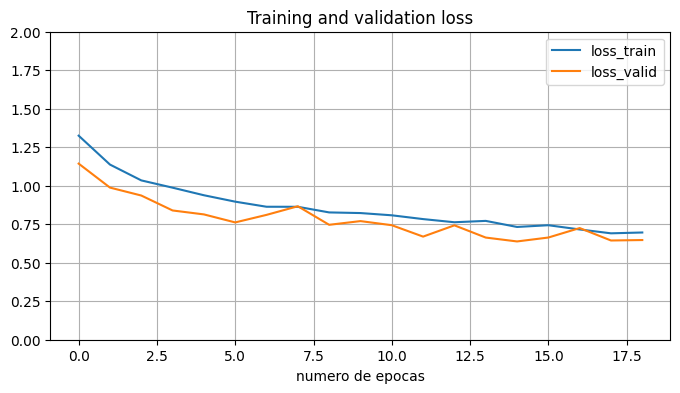

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame({'loss_train': history_2.history['loss'],
              'loss_valid': history_2.history['val_loss']}).plot(figsize=(8,4))

plt.grid(True)
plt.ylim(0,2)
plt.xlabel('numero de epocas')
plt.title('Training and validation loss');

También podemos visualizar rápidamente la evolución de la loss function y el accuracy en los 2 modelos

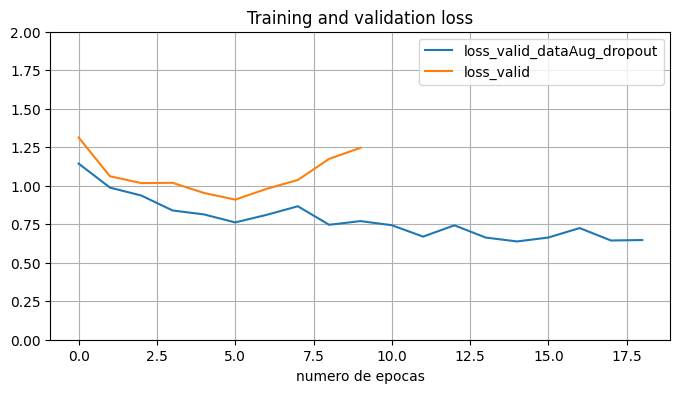

In [23]:
pd.DataFrame({'loss_valid_dataAug_dropout': history_2.history['val_loss']}).plot(figsize=(8,4))
plt.plot(history_1.history['val_loss'], label='loss_valid')
plt.grid(True)
plt.ylim(0,2)
plt.xlabel('numero de epocas')
plt.title('Training and validation loss')
plt.legend();

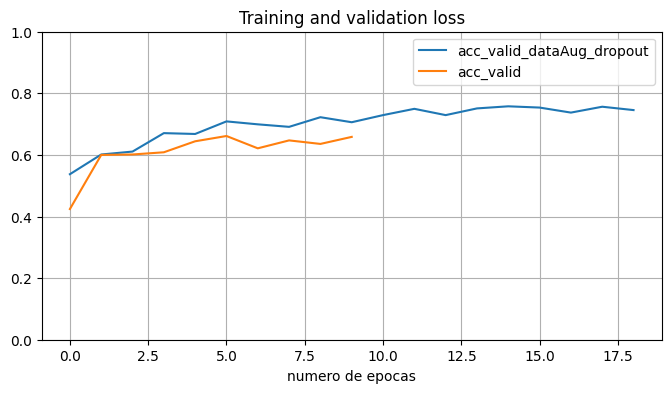

In [24]:
pd.DataFrame({'acc_valid_dataAug_dropout': history_2.history['val_acc']}).plot(figsize=(8,4))
plt.plot(history_1.history['val_acc'], label='acc_valid')
plt.grid(True)
plt.ylim(0,1)
plt.xlabel('numero de epocas')
plt.title('Training and validation loss')
plt.legend();

Observamos varias cosas en las gráficas de arriba:

* Gracias a las técnicas que hemos aplicado, hemos conseguido retrasar la aparición del sobreajuste y por tanto entrenar mejor

* hemos conseguido mejorar considerablemente el accuracy, de un **65-68%** aprox del primer modelo a un **75%-78%** aprox obtenido aplicando data augmentation y dropout, lo cual es bastante.

Sin embargo, solo hemos retrasado el problema, vemos que tarda más en aparecer (más epochs) pero eventualmente la red se estanca, hasta que el callback de early stopping detiene la ejecución debido a que el modelo comienza a tener dificultades para generalizar y vuelve a aparecer el sobreajuste, hemos alcanzado el límite que este modelo podrá tener, quizá haciendo ajuste de hiperparámetros o alterando la arquitectura de la red podramos obtener alguna mejora leve pero poco más

# c) Modelo 3: Transfer Learning (objetivo: accuracy_valid > 88%)

En nuestro problema de clasificación de flores, el utilizar CNNs diseñadas y entrenadas por nosotros mismos, aparece una barrera en las proximidades del 75-80% de precisión del modelo (siempre sobre validación).

Para superar este escollo, el siguiente paso natural es la utilización de modelos preentrenados. Existe una gran variedad de ellos basados en redes CNNs clásicas, donde la principal diferencia es que acumulan más capas que nuestros modelos 1 y 2. Adicionalmente, en estos modelos se han ido incorporando diferentes propuestas para mejorar la arquitectura de la CNN.

En general, utilizando estos modelos convolucionales preentrenados podemos alcanzar accuracies próximos al 90%. Normalmente, estos modelos han sido previamente entrenados sobre datasets de gran tamaño y con gran número de categorías. P.e. en subconjuntos de Imagenet (14 millones de imagenes de 22K categorías).

Dado que estos modelos se entrenaron para resolver un problema "relativamente" parecido a nuestro problema de clasificación, parece razonable pensar que podemos aprovechar ese conocimiento capturado en la red para resolver nuestro problema de clasificación de flores.

Se pide que implemente y entrene un modelo utilizando una de estas redes pre-entrenadas (__con el objetivo de alcanzar un accuracy (sobre el conjunto de validación > 88%__). Los pasos que debe seguir son:

1.   Importa el modelo desde Tensorflow.
2.   Dado que este modelo ha sido entrenado para clasificar entre 1.000 categorías, las capas densas finales del modelo no son útiles para nuestro problema de clasificación de 5 categorías (es lo que suele llamarse include_top = SI/NO). De manera que eliminamos lo que a veces se suele llamar el "top model". De este modo sólo nos quedamos con la parte que hace la funcionalidad de "procesamiento" de la imagen.
3.   Añadimos una capa de flatten y tres nuevas capas densas especificas para nuestro problema con dimensiones 4096, 1072 y la que necesite la capa de salida (con sus correspondientes drop-out).
4.   Después haremos el denominado `Fine-Tuning` del modelo. Para ello le indicaremos a Tensorflow que únicamente debe entrenar:
   * Las dos últimas capas convolucinoales de la red preentrenada
   * Las tres capas densas que hemos incluido nuevas.

  De esta forma, quedan congeladas (no se entrenan los pesos) todas las capas convolucionales de la red preentrenada, excepto las dos últimas. Para estados dos últimas capas convolucionales, usando como punto de partida los del pre-trained model obtendremos un ajuste fino de sus pesos. Por supuesto, tensorflow entrenará no solo estas dos ultimas capas convolucionales, sino también las tres capas densas que hemos añadido.

5. Dado que estamos reutilizando un modelo que no "es nuestro", deberemos ceñirnos al tamaño de imagen que permite la red a la entrada.

Para elegir el modelo preentrenado que debe utilizar cada grupo, proceda del siguiente modo:
* Paso 1: sume los DNIs de los componentes del grupo (si el grupo tiene un sólo miembro, vaya directamente al paso 2). res = dni_1 + dn_2
* Paso 2: Aplique la siguiente operación al resultado anterior: res mod 6.
* Paso 3: Tome el modelo cuyo número asociado coincide con el resultado de la operación anterior.
* Paso 4: El porcentaje que aparece entre paréntesis junto al nombre del modelo es el accuracy (en validación) que deberías poder alcanzar sin dificultad utilizando el modelo. En todos los casos considera un input_shape = (224, 224, 3).

  0. Resnet50 (>90%)
  https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50

  1. Resnet101 (>90%) input_shape = (224, 224, 3)
  https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/ResNet101

  2. VGG16 (>90%) input_shape = (224, 224, 3)
  https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16

  3. VGG19 (>90%) input_shape = (224, 224, 3) https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19/VGG19

  4. Xception (>88%) input_shape = (224, 224, 3) https://www.tensorflow.org/api_docs/python/tf/keras/applications/xception/Xception

  5. Inceptionv3 (>88%) input_shape = (224, 224, 3) https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3

P.e. si los DNIs de los alumnos son: 12345678 y 23456781. La suma es 35802467. De donde 35802467 mod 6 = 5. Por tanto, tomaríamos el modelo Inceptionv3.

In [25]:
print('Utilizar el modelo: ',(29543817+49132053) % 6)

Utilizar el modelo:  0




6.   Una vez definido el modelo tenemos que crear los data_generators asociados. Para ello:
  * Utiliza Data augmentation.
  * Las imágenes tienen que ser preprocesadas igual que cuando se entrenó el modelo VGG original. Para ello se utiliza el parámetro `preprocessing_function=preprocess_input` (preprocess_input importado desde `keras.applications.vgg16` en ambos generators (train y valid). Por tanto, no hay que indicarle `rescale`. En caso de ser necesario, se encargará `preprocess_input`.
  * Recuerda que el tamaño de imagen debe ser: 224x224.




In [26]:
from tensorflow.keras.applications.resnet50 import preprocess_input

Creamos los nuevos generadores ajustados como se indica:

In [27]:
train_datagen_model_3= ImageDataGenerator(    # Mantenemos los parametros para Data Augmentation anteriores
    brightness_range=[0.5, 1.5],
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input   # No indicamos rescale gracias a preprocess_input
)

val_datagen_model_3 = ImageDataGenerator(preprocessing_function=preprocess_input) # Igual que antes, no hacemos rescale, se encargará preprocess_input




In [28]:
train_generator_model_3 = train_datagen_model_3.flow_from_directory(
        train_dir,
        target_size=(224, 224), # Ajustamos al tamaño de imagen que requiere el modelo preentrenaado
        batch_size=20,
        class_mode='sparse')

validation_generator_model_3 = val_datagen_model_3.flow_from_directory(
        val_dir,
        target_size=(224, 224), # Ajustamos al tamaño de imagen que requiere el modelo preentrenaado
        batch_size=20,
        class_mode='sparse')

Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


Importamos el modelo ResNet50

In [29]:
from tensorflow.keras.applications.resnet50 import ResNet50

Cargamos el modelo, tal y como se indica, hacemos `include_top=False` pues esta parte de la red no la necesitaremos
* Según la documentación de keras, debemos indicar que tipo de pooling haremos si no incluimos el top.

* Especificaremos que no queremos entrenar las capas de esta red, sin esto estaríamos volviendo a entrenar todo el modelo, y nos interesa precisamente aprovechar a este mismo ya como viene entrenado.

In [30]:
resnet = ResNet50(include_top=False,input_shape=(224, 224,3))

# Obviamente no queremos entrenar las capas de la red de la que estamos haciendo transfer learning, así que las ajustamos para que no se entrenen
# eso si, las 2 últimas capas convulacionales sí las entrenaremos, las excluimos mediante slicing



94765736/94765736 [==============================] - 2s 0us/step


 El modelo preentrenado que usaremos es el de `ResNet50`, como su nombre indica, tiene 50 capas, aunque es distinta de las CNNs que hemos estudiado, su nombre, **ResNet**, proviene de **Residual Network**, pues la principal caracteristica del modelo es que introduce conexiones residuales.

 * Haciendo `resnet.summary()` podemos ver la estructura de la red, aunque es algo larga y compleja

In [31]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

La red se estructura de la siguiente forma, la forma en la que haciendo `model_3.summary()` es un poco extraña debido a la forma en la que trabaja tensorflow, así que la hemos organizado en diagramas para que se entienda mejor:
* Primero tenemos una capa `Input_1` que es la capa de entrada, con shape **(224,224,3)**
* Despúes una capa Convolucional, con **64 Kernels 7x7** y **padding 3** y **Stride 2** nos deja con un **shape (112,112,64)**
* Una capa de Pooling (MaxPooling), con **Stride 2**

![ResNet50 Entrada y primera sección](https://i.imgur.com/o3udc9K.jpg "ResNet50 Entrada y primer sección")


Por ahora llevamos 2 capas de la red (`Conv1` y `Pool1`)

A continuación pasamos al siguiente gran bloque de la red, el primero en hacer uso de las conexiones residuales que mencionamos, el objetivo de estas es enfrentar y solucionar el problema del desvanecimiento del gradiente.

* Al proporcionar rutas directas que permiten al gradiente fluir entre las capas se mitiga muchísimo el problema, es una idea generalizada hoy día pero que en su momento fue un cambio bastante importante.

Por tanto tendremos 2 "rutas" la habitual, y la de "atajo", finalmente se acaban combinando, esto es esencialmente lo que evita el mencionado desvanecimiento del gradiente.

A continuación tenemos 3 bloques residuales, que realizan las conexiones residuales mencionadas, cada uno de estos bloques tiene 3 capas para un total de 9.



![ResNet50 Segunda sección](https://i.imgur.com/yjYZ08H.jpg "ResNet50 Segunda sección")

Tenemos 3 capas con Kernels **1x1**, **3x3** y **1x1**, las capas 1x1 reducen y restablecen las dimensiones mientras la capa 3x3 hace de cuello de botella dado su reducido tamaño de entrada/salida.

* Tensorflow nos lo muestra de una forma algo confusa, en el diagrama queda más claro que hace cada capa mostrada por `model_3.summary()`

  * Cada capa tiene su **Convolución** (color rojo)
  * Le sigue una capa de **BatchNormalization** (bn en adelante, color azul) que se encarga de normalizar a lo largo de los mini batches en lugar de todo el conjunto de datos, lo que acelera el entrenamiento y en general facilita lo facilita. En resumen, normalizamos los minibatches en lugar del dataset entero.
  * Finalmente con las capas de **Activation** simplemente aplicamos la función de activación (relu)


* La tercera capa es algo distinta, se hace la **Convolución** y se normaliza con su capa **bn**, pero no se aplica la función de activación hasta hacer la combinación de esa capa con el "residuo" que fluye por la ruta de shortcut.

  * Como detalle, la capa `Conv2_block1_0_conv`,y su correspondiente capa de **bn** existen sólo entre secciones, es decir, entre lo bloques en los que se altera la dimensionalidad pues es necesario ajustar la entrada residual que pasa por el camino de **shortcut** a la nueva que se ha obtenido por el **main path**, ambos, main y shortcut deben tener la misma dimensionalidad para hacer la combinación

Esto es lo que ocurre en cada uno de los 3 primero bloques residuales, en la imagen tenemos 1, la estructura se repite de forma similar 3 veces, siendo la salida del bloque 1 la entrada para el bloque 2, tanto por la ruta principal como por la de atajo.

Una vez hemos entendido como funciona uno de estos bloques, es fácil comprender el resto de la red, pues esencialmente se compone de muchos de estos, a continuación, un diagrama donde abstraemos los bloques y se puede ver de forma más sencila:

![ResNet50 Completa](https://i.imgur.com/2nN6PVG.jpg "ResNet50 Completa")

Finalmente podemos ver todas las secciones de la red, se ha simplificado lo máximo posible para priorizar la estructura de la misma, pero ahora detallaremos un poco lo que ocurre en cada bloque `
ConvX` a partir de lo que ya explicamos:

* ResNet50 se utiliza padding &rarr; `padding="same"`

* Primero partimos, como indicamos antes, de la capa `Conv1` con Kernel 7x7 de 64 canales, recibe la imagen de **entrada (224,224,3)** y da una **salida (112,112,64)**

* De ahí pasamos a la primera capa de Pooling `MaxPool` que con **Stride 2** resulta en una **salida (56,56,64)**

* Pasando a la primera de las secciones  tenemos que está compuesta por 3 bloques con conexiones residuales, como indicamos arriba cada uno de estos bloques a su vez, contiene 3 capas con **Kernels 1x1, 3x3, 1x1**, con **salida (56,56,256)**
  * Cada uno de estos 3 bloques tendrá los mismos tamaños de Kernel (de hecho esto es para toda la red) y mantendrá en todo momento el **Output Shape de (56,56,256)**

* Cuando pasamos de una sección a otra, como por ejemplo de `Conv1` a `Conv2` principalmmente ocurren 2 cosas

  * El último bloque **Block2_3** resaltado en amarillo tiene **stride 2** con lo que reducimos el **feature map de 56x56 a 28x28**

  * Para compensar este ajuste **duplicamos** el número de canales, de **64 a 128**

  * `Conv2` hará todas sus operaciones de manera similar, que acabará transformando **(28,28,128) en (28,28,512)**, que luego al pasar a `Conv3` será de **(14,14,256)**

* Es por tanto que acabamos con un **shape (28,28,512)** al salir de `Conv3`

* Esto se repite en el resto de la red, de forma que al salir de `Conv4` tendremos un **shape (14,14,1024)** y en `Conv5` un **shape (7,7,2048)**

* Finalmente tenemos la capa de **Global Average Pooling**, `MaxPool`, esta capa tiene como finalidad dar una salida de shape (num_clases, 2048), básicamente asegura que la salida de la capa tiene el mismo número de canales que el número de clases que estemos clasificando

  * Cogemos cada canal y se calculo el promedio de sus valores, convirtiéndolo en un solo valor

  * Nosotros no usaremos esta capa pues optaremos por añadir una capa `Flatten` en su lugar, que al estar en el bloque de decisión está en `MLP`, sin embargo en la arquitectura originarl de ResNet sí está presente, y nos parecía interesante mencionarlo

    * En Tensorflow, por defecto al importar ResNet50, el parámetro `pooling` por defecto viene como `None`, para que añadamos nosotros la capa que necesitemos (Flatten en nuestro caso), sin embargo se pueden poner también `AvgPool` o `Maxpool`, siendo la primera la que mencionamos, y la segunda su versión que en lugar de promediar los valores obtiene su máximo.

Nos piden entrenar las últimas dos capas Convulacionales de la red, vamos a ver en detalle que significa esto con lo que sería la parte final de la red:

![ResNet50 Train](https://i.imgur.com/qnACJNN.jpg "ResNet50 Train")



Como cada Bloque de la red está formado por 3 capas, entrenaremos las 2 últimas capas del último bloque, esto es, lo señalado en rojo.

* También resaltamos en azul lo que vendría a ser el bloque de decisión que añadimos después que evidentemente también entrenamos.

* Podemos ver rápidamente los nombres de las capas de la red de la siguiente forma:

In [ ]:
print(list(layer.name for layer in resnet.layers))

['input_1', 'conv1_pad', 'conv1_conv', 'conv1_bn', 'conv1_relu', 'pool1_pad', 'pool1_pool', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_2_bn', 'conv2_block1_2_relu', 'conv2_block1_0_conv', 'conv2_block1_3_conv', 'conv2_block1_0_bn', 'conv2_block1_3_bn', 'conv2_block1_add', 'conv2_block1_out', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_2_bn', 'conv2_block2_2_relu', 'conv2_block2_3_conv', 'conv2_block2_3_bn', 'conv2_block2_add', 'conv2_block2_out', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_2_bn', 'conv2_block3_2_relu', 'conv2_block3_3_conv', 'conv2_block3_3_bn', 'conv2_block3_add', 'conv2_block3_out', 'conv3_block1_1_conv', 'conv3_block1_1_bn', 'conv3_block1_1_relu', 'conv3_block1_2_conv', 'conv3_block1_2_bn', 'conv3_block1_2_relu', 'conv3_block1_0_conv', 'conv3_block1_3_conv', 'conv3_block1_0_bn', 'conv3_bl

Creamos una lista con los nombres de las capas que queremos entrenar, y haremos que para capa de la red, si no está incluida en dicha lista no la entrene

In [ ]:
resnet_train_layers = [
    "avg_pool",

    "conv5_block3_out",
    "conv5_block3_add",

    "conv5_block3_3_bn",
    "conv5_block3_3_conv",

    "conv5_block3_2_relu",
    "conv5_block3_2_bn",
    "conv5_block3_2_conv"]

for layer in resnet.layers:
  if layer not in resnet_train_layers:
      layer.trainable = False


Por supuesto, todo esto puede ser considerado un poco "Overkill", muchas veces al hacer transfer learning ni siquiera se toca el modelo preentrenado, o no se conoce lo suficiente su arquitectura interna como para hacer un `Fine-Tuning de este tipo`

Otra opción, la mas sencilla, y que probablemente de resultados similares, es símplemente indicarle que entrene las dos últimas capas de la red sin más
  * Se puede comentar para probar la versión anterior si es necesario.
  * En las pruebas realizadas da resultados similares con un mucho menor tiempo por epoch.

In [33]:
for layer in resnet.layers: # Deshacemos lo anterior
    layer.trainable = True

for layer in resnet.layers[:-2]:  # Simplemente indicamos que entrene las 2 últimas capas
    layer.trainable = False

A continuación crearemos un nuevo modelo y le añadiremos como "base" el modelo de ResNet50, a partir de ahí podemos trabajar y añadir capas nuevas como de costumbre

In [34]:
# Crearemos el modelo que usaremos nosotros, y le añadimos ResNet sin el top, lo que será nuestra base
model_3 = keras.Sequential()
model_3.add(resnet)

# Añadiremos las capas densas que se nos indican, aplanando primero la red con una capa de Flatten
# y haciendo el correspondiente dropout a cada capa
model_3.add(keras.layers.Flatten())

model_3.add(keras.layers.Dense(4096, activation='relu'))
model_3.add(keras.layers.Dropout(0.5))


model_3.add(keras.layers.Dense(1072, activation='relu'))
model_3.add(keras.layers.Dropout(0.5))

# Nuestro problema tiene 5 clases de flores, por tanto indicamos 5 neuronas en la capa de salida
model_3.add(keras.layers.Dense(5, activation='softmax'))

# Finalmente compilamos el modelo tal y como los anteriores
optim = keras.optimizers.Adam(learning_rate=0.00005) # bajamos el learning rate, esto se hace mucho al trabajar con modelos preentrenados
model_3.compile(loss='SparseCategoricalCrossentropy',
              optimizer=optim,
              metrics=['acc'])

Podemos ver en la estructura del modelo como partimos de la red ResNet que tiene un `Output Shape` de 2048, a partir de ahí aplanamos y entrenaremos las capas densas para nuestro caso particular.

In [35]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 4096)              411045888 
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 1072)              4391984   
                                                                 
 dropout_2 (Dropout)         (None, 1072)              0         
                                                                 
 dense_6 (Dense)             (None, 5)                

Finalmente entrenamos el modelo, reutilizaremos los generadores anteriores que hicimos para realizar data Augmentation

In [36]:
history_3 = model_3.fit(
    train_generator_model_3,
    steps_per_epoch=len(train_generator_model_3),
    epochs=50,
    validation_data=validation_generator_model_3,
    validation_steps=len(validation_generator_model_3),
    callbacks=[es_callback],
    verbose=2
)

Epoch 1/50
147/147 - 77s - loss: 2.6910 - acc: 0.6538 - val_loss: 1.0852 - val_acc: 0.8068 - 77s/epoch - 523ms/step
Epoch 2/50
147/147 - 65s - loss: 1.7825 - acc: 0.7370 - val_loss: 0.5272 - val_acc: 0.8898 - 65s/epoch - 442ms/step
Epoch 3/50
147/147 - 65s - loss: 1.4925 - acc: 0.7652 - val_loss: 0.4651 - val_acc: 0.8789 - 65s/epoch - 441ms/step
Epoch 4/50
147/147 - 64s - loss: 1.1731 - acc: 0.8034 - val_loss: 0.5078 - val_acc: 0.8762 - 64s/epoch - 436ms/step
Epoch 5/50
147/147 - 64s - loss: 1.0867 - acc: 0.8068 - val_loss: 0.3977 - val_acc: 0.8952 - 64s/epoch - 435ms/step
Epoch 6/50
147/147 - 63s - loss: 0.8981 - acc: 0.8211 - val_loss: 0.4335 - val_acc: 0.8925 - 63s/epoch - 426ms/step
Epoch 7/50
147/147 - 65s - loss: 0.8404 - acc: 0.8303 - val_loss: 0.3350 - val_acc: 0.9061 - 65s/epoch - 445ms/step
Epoch 8/50
147/147 - 64s - loss: 0.7698 - acc: 0.8378 - val_loss: 0.3526 - val_acc: 0.8993 - 64s/epoch - 433ms/step
Epoch 9/50
147/147 - 63s - loss: 0.7352 - acc: 0.8385 - val_loss: 0.3848

In [37]:
final_accuracy = history_3.history['val_acc'][-5] # paciencia 4, obtuvo 4 epochs en la que no se mejoró el valor de la loss function en este índice
print("Resultado Final:", final_accuracy)

Resultado Final: 0.9047619104385376


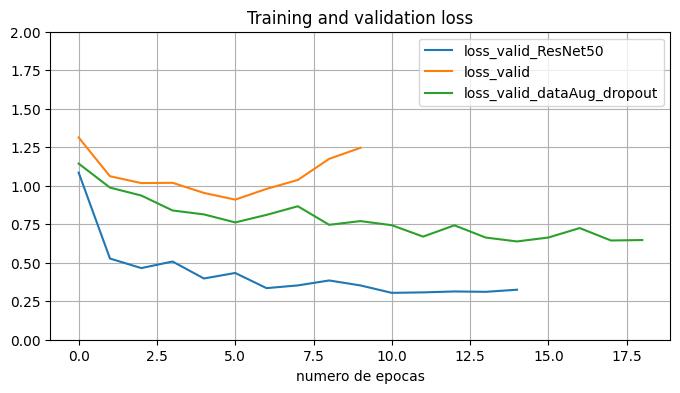

In [38]:
pd.DataFrame({'loss_valid_ResNet50': history_3.history['val_loss']}).plot(figsize=(8,4))
plt.plot(history_1.history['val_loss'], label='loss_valid')
plt.plot(history_2.history['val_loss'], label='loss_valid_dataAug_dropout')
plt.grid(True)
plt.ylim(0,2)
plt.xlabel('numero de epocas')
plt.title('Training and validation loss')
plt.legend();

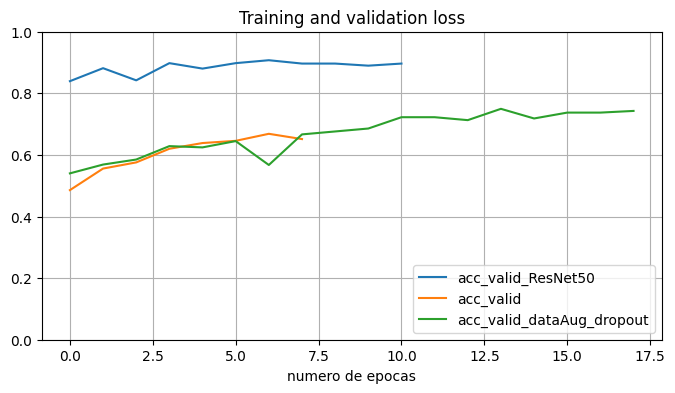

In [ ]:
pd.DataFrame({'acc_valid_ResNet50': history_3.history['val_acc']}).plot(figsize=(8,4))
plt.plot(history_1.history['val_acc'], label='acc_valid')
plt.plot(history_2.history['val_acc'], label='acc_valid_dataAug_dropout')
plt.grid(True)
plt.ylim(0,1)
plt.xlabel('numero de epocas')
plt.title('Training and validation loss')
plt.legend();

Podemos Comprobar rápidamente la mejora con respecto a los dos modelos anteriores, hemos pasado de un accuracy de en torno al 70% a más del 90% lo cual es una gran mejora y demuestra gran eficacia del uso del transfer learning.

* De igual forma podemos ver que hemos obtenido estos resultados en bastantes menos épocas que en el modelo anterior, pero sin embargo, el costo computacional de entrenar el modelo preentrenado es mayor:
---


7.   A la hora de entrenar un modelo pretrained es típico bajar el learning rate respecto al que utilizaríamos para un modelo nuestro desde cero.

     * Hemos bajado el Learning rate a 0.00005 en el optimizador Adam, después de algunas pruebas es el que mejor resultado nos ha dado buscando un compromiso entre velocidad de entrenamiento y buenos resultados.

Investiga cómo es la estructura del modelo preentrenado que has utilizado. Descríbelo

  * Hemos descrito la estructura en detalle arriba pues nos parecía más apropiado y también por que nos hemos centrado en comprender el modelo en detalle antes de utilizarlo a ciegas, y lo fuimos redactando y alterando según realizábamos la implementación.

## Bibliografía


[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun -
[Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385v1)


[2] Min Lin, Qiang Chen, Shuicheng Yan - [Network In Network](https://arxiv.org/abs/1312.4400v3) - Pag.4, Global Average Pooling

[3] [Batch Normalization in Convolutional Neural Networks](https://www.baeldung.com/cs/batch-normalization-cnn) – Baeldung

[4] [Detailed Guide to Understand and Implement ResNet](https://cv-tricks.com/keras/understand-implement-resnets/) – CV-Tricks

[5] [ResNet-50: The Basics and a Quick Tutorial](https://datagen.tech/guides/computer-vision/resnet-50/) – Datagen

[6] [Understanding ResNet50 architecture](https://iq.opengenus.org/resnet50-architecture/) – OpenGenus

[6] [Understanding and visualizing ResNets](https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8) – Towards Data Science




